In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import root_mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [52]:
back_df = pd.read_csv(r'C:\Users\DAI.STUDENTSDC\Desktop\Machine Learning\Data\Data Sets\WGEM-IND_CPTOTNSXN.csv', index_col=0) 
back_df.index = pd.DatetimeIndex(back_df.index, dayfirst=True)
back_df.index = pd.to_datetime(back_df.index, errors='coerce')

back_df

,Value
Date,
1987-12-31,19.448655
1988-12-31,21.274000
1989-12-31,21.967677
1990-12-31,23.939126
1991-12-31,27.259261
1992-12-31,30.471893
1993-12-31,32.411083
1994-12-31,35.720636
1995-12-31,39.372939


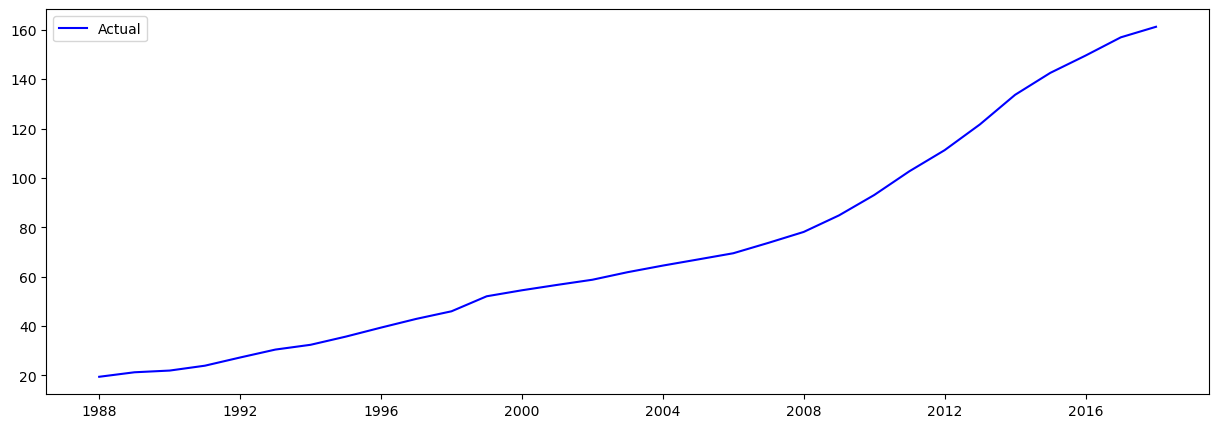

In [53]:
plt.figure(figsize=(15,5))
plt.plot(back_df.index, back_df['Value'], color='blue', label='Actual') 
plt.legend()
plt.show()

ARIMA

In [54]:
y=back_df['Value']

In [55]:
y_train = y[:-4]
y_test = y[-4:]
y_train.shape, y_test.shape

((27,), (4,))

In [56]:
order_of_auto_regressive_model = 3
order_of_differencing = 1  
order_of_moving_avg_model = 0 
 

model = ARIMA(
    y_train, 
    order=(
        order_of_auto_regressive_model, 
        order_of_differencing, 
        order_of_moving_avg_model
    ), 
    freq='A',  
)

model_fit = model.fit()

RMSE:  11.466970648610834
RMSE: 11.47


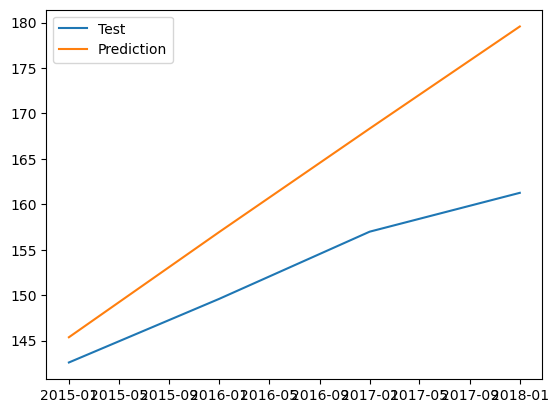

In [57]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)
print("RMSE: ", error)

y_pred.index = y_test.index
print(f'RMSE: {error:.2f}')

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

SARIMA

In [58]:
order_of_auto_regressive_model = 3
order_of_differencing = 1  
order_of_moving_avg_model = 0 
 

model = ARIMA(
    y_train, 
    order=(
        order_of_auto_regressive_model, 
        order_of_differencing, 
        order_of_moving_avg_model
    ), 
    freq='A', 
    seasonal_order=(1,1,1,12)
)

model_fit = model.fit()

RMSE: 11.03


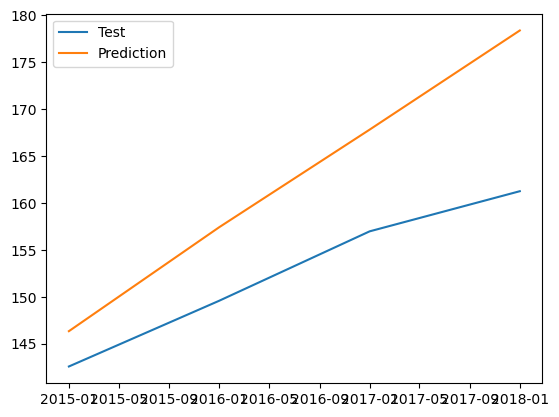

In [59]:
y_pred = model_fit.predict(start=len(y_train), end=(len(y_train) + len(y_test) - 1))

# Calculate RMSE
error = root_mean_squared_error(y_test, y_pred)


print(f'RMSE: {error:.2f}') 
y_pred.index = y_test.index

plt.plot(y_test, label='Test')
plt.plot(y_pred, label='Prediction')
plt.legend()
plt.show()

Auto ARIMA

In [60]:
from pmdarima.arima import auto_arima

In [61]:
def arima_with_plot(model):
    
    y_pred = model.predict(n_periods=len(y_test))

    # Calculate RMSE
    error = root_mean_squared_error(y_test, y_pred)
    print("RMSE: ", error)

    y_pred.index = y_test.index

    plt.figure(figsize=(15, 5))
    plt.plot(y_train, label='Train')
    plt.plot(y_test, label='Test')
    plt.plot(y_pred, label='Prediction')
    plt.legend()
    plt.show()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.709 seconds
RMSE:  15.240717754968092


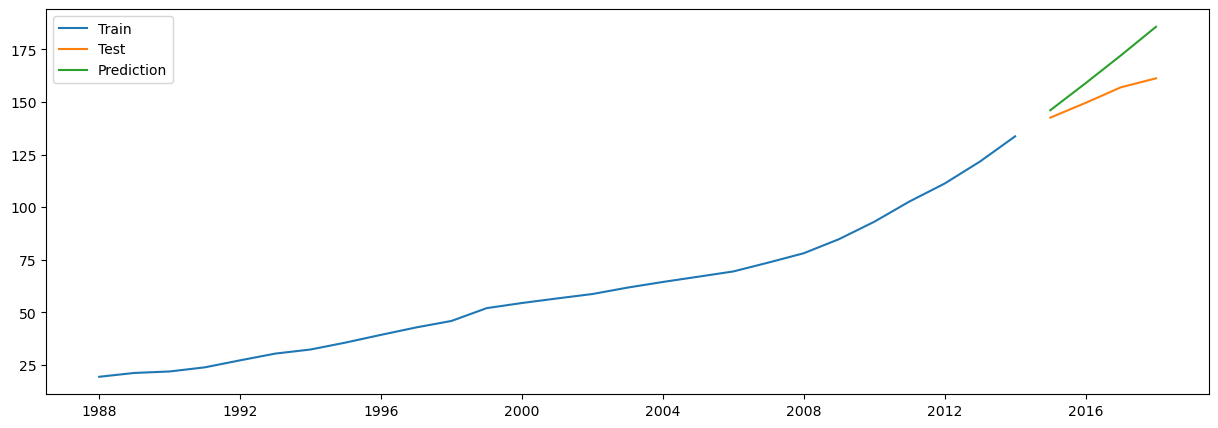

In [62]:
# Without seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True) 
arima_with_plot(model)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.34 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=91.240, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=92.766, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=92.810, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=91.165, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=91.712, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=91.639, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=93.617, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0] intercept
Total fit time: 0.697 seconds
RMSE:  15.240717754968092


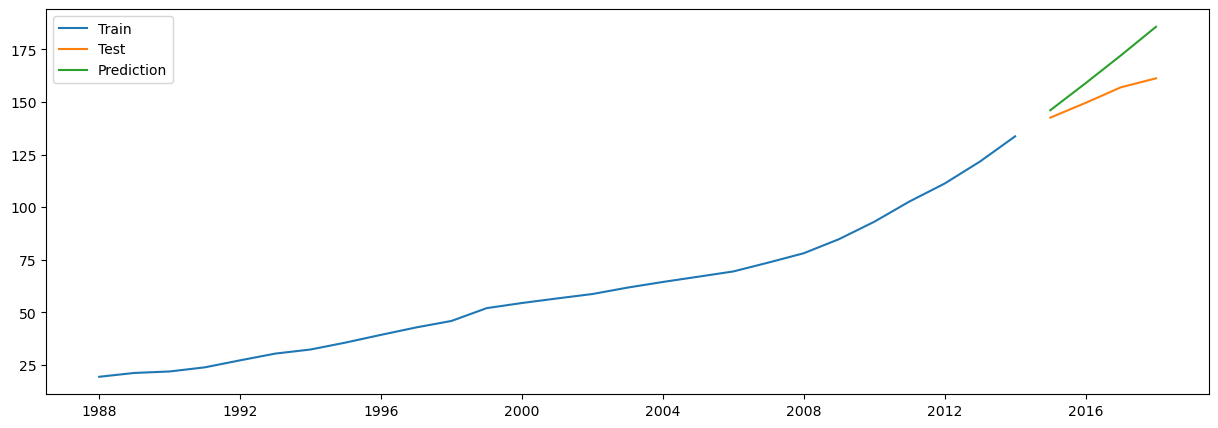

In [63]:
# With seasonal component
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=True, m=1) 
arima_with_plot(model)

Holt

RSME: 12.11363050603858


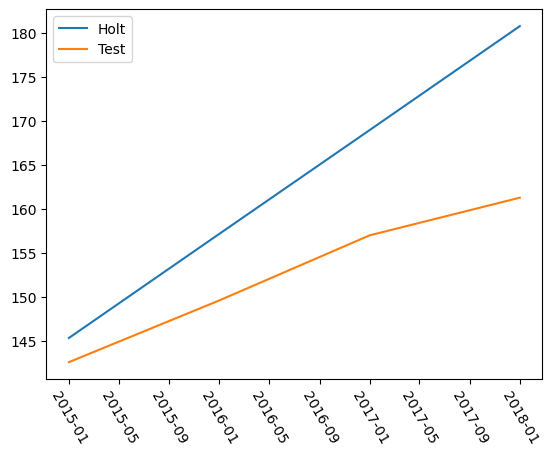

In [64]:
from math import sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error


damp_HW = Holt(y_train)
fit6 = damp_HW.fit()
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

Holt Winters with Damping

RSME: 8.326627517663715


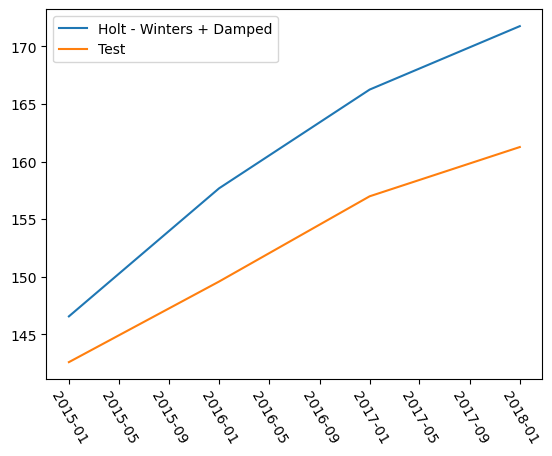

In [65]:
from math import sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing


damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'mul',damped_trend=True)
fit6 = damp_HW.fit()
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

Holt Exponential with damped trend

RSME: 18.871820312634423


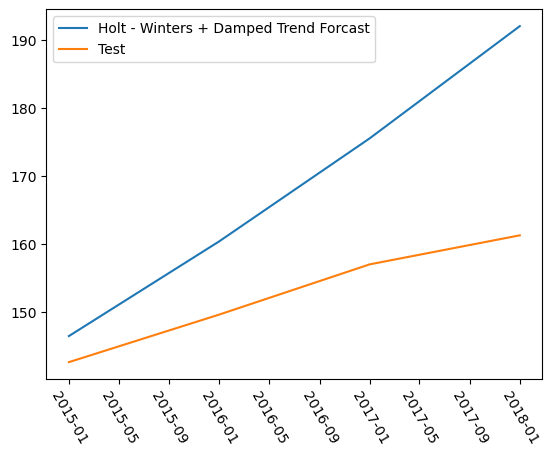

In [66]:
from math import exp, sqrt
from statsmodels.tsa.holtwinters import Holt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing



damp_HW = Holt(y_train, exponential=True, damped=True)
fit6 = damp_HW.fit()
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

RSME: 11.902964528319641


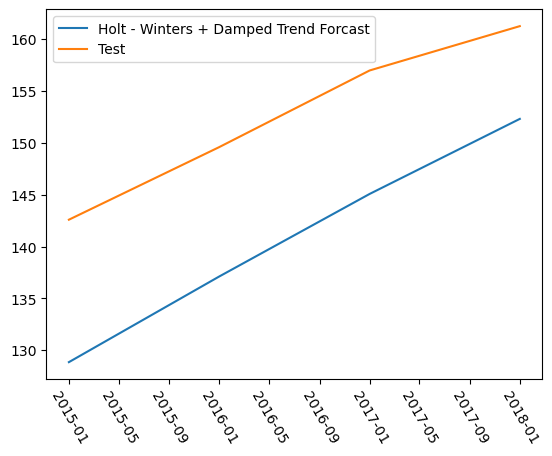

In [67]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import ExponentialSmoothing


alpha, beta, gamma = 0.2, 0.5, 0.2
damp_HW = ExponentialSmoothing(y_train, seasonal_periods=12, trend='add', seasonal= 'add',damped_trend=False)
fit6 = damp_HW.fit(smoothing_level=alpha, smoothing_trend=beta, smoothing_seasonal= gamma )
fcast6 = fit6.forecast(len(y_test))


print(f'RSME: {sqrt(mean_squared_error(y_test, fcast6))}')
damp_HW_fcast = pd.Series(fcast6, index= y_test.index)
damp_HW_fcast.index = y_test.index

error = round(root_mean_squared_error(y_test, damp_HW_fcast),2)
plt.xticks(rotation=-60)
plt.plot(damp_HW_fcast, label = 'Holt - Winters + Damped Trend Forcast')
plt.plot(y_test, label = 'Test')
plt.legend(loc = 'best')
plt.show()

2018-12-31    166.180982
2019-12-31    170.880303
2020-12-31    175.579624
Freq: YE-DEC, dtype: float64


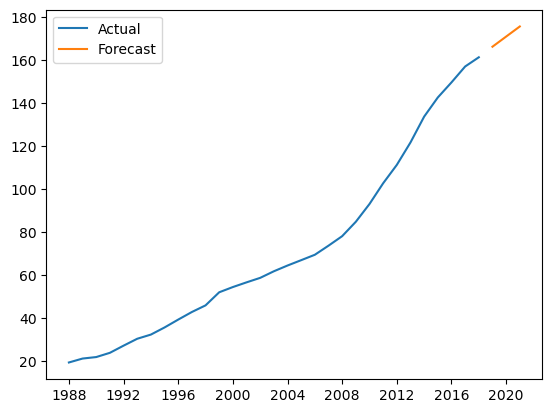

In [68]:
holt = Holt(y)
fit = holt.fit()
fcast = fit.forecast(3)
print(fcast)

y = back_df['Value']
plt.plot(figsize=(15,5))
plt.plot(y, label = 'Actual')
plt.plot(fcast, label = 'Forecast')
plt.legend(loc = 'best')    
